<h3>Google Play Store App Purchasing Trends</h3>

<p><b>Authors: </b><br>
Bryan Aguiar,
Alberto Lucas,
Emerald Kunkle</p>

<p><b>Introduction:</b><br>
In our final project, we selected the data set Google Play Store Apps from Lavanya on Kaggle. Our goal is to compare the amount of people buying an app with a high rating, to infer if higher rated apps are correlated with a higher likelihood of purchase. The results would be useful for consumers to know when considering an app purchase, and may save money if a user is vesting more of their willingness to purchase on the ratings from others rather than the personal utility they might find with the prospective app.</p>

<p><b>Description of Data Set:</b><br>
Our selected data set is a compiled list of Google Play Store apps and the apps’ statistics in 2019. The data is purely quantitative, consisting of values such as application name, category, rating, number of reviews, size of the application, number of installs, whether or not the app is free, the price of the app (when it is not free), the content rating, and the genres. It is notable that all these values came from the time of the data collection, and may not accurately reflect current values found on the Google Play Store today.</p>

<p><b>Predictions:</b><br>
Our prediction is that there will indeed be a correlation between highly rated apps and the amount of purchases it garnered. This is due to the fact that many people often seek the advice of others when debating whether to make a purchase, and will often use this advice to estimate the reputation of an app developer they are not familiar with.</p>

<p><b>Features used as predictors:</b><br>
The most important data values we will be using in our evaluations is the Installs (number of user downloads/installs for the app), the Type (paid or free), and Rating (as when scraped). The predictors we anticipate is that an app of type “Paid” will have a higher rate of Installs correlated with a higher number of Rating.</p>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
sns.set()
sns.set_context('notebook')

# change default plot size
rcParams['figure.figsize'] = 9,7

<br>
<h3><u> Data Set - googleplaystore.csv </u></h3>
<p><b>Source:</b> 
<a href="https://www.kaggle.com/lava18/google-play-store-apps">https://www.kaggle.com/lava18/google-play-store-apps </a></p>
<p><b>Description:</b> Contains information related to applications offered on the Android Playstore marketplace.</p>

In [38]:
# data file must be downloaded from source and pathname below should reference that file
df = pd.read_csv('googleplaystore.csv')

In [63]:
# All columns/features in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 914.2+ KB


In [27]:
# First few rows of the data set
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<br>
<h3><u> Data Preparation</u> </h3>
<p> To Do:<br>
<i>Add one hot encoding <br>
Shorten app names <br>
Categorize installs</i></p>

In [39]:
#Count how many na values are in each column/feature
print(df.isna().sum())
print("\nTotal na Values: {}".format(df.isna().sum().sum()))

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Total Na Values: 1487


In [40]:
# Drop the rows with missing information
previousRows = df.shape[0]

df = df.dropna()
df.reset_index(drop=True, inplace = True)
newRows = df.shape[0]

print("Previous rows:", previousRows)
print("new rows:", newRows)
print("% Change:", (1.0 * (newRows - previousRows) / previousRows) * 100.0)
print("Dropped rows with NA values:", previousRows - newRows)
print("Total current na Values: {}".format(df.isna().sum().sum()))

Previous rows: 10841
new rows: 9360
% Change: -13.661101374411954
Dropped rows with NA values: 1481
Total Na Values: 0


In [42]:
#Convert price column from object to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

#Convert reviews column from object to int
df['Reviews'] = df['Reviews'].astype(int)

C:\Users\Alberto\AppData\Local\Temp/ipykernel_21812/1571949260.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [62]:
#Remove columns not related to research question
df.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0.0,Everyone,Education
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference


</br>
<h3><u> Data Exploration & Visualization</u> </h3>
<p> To Do:<br>
<i>Fix crowded x-axis on some graphs <br>
Make a grid exploring several features at once <br>
Add other types of plots (scatter, violin, etc) <br>
Create polynomial features<br>
Sort free from paid apps<br>
Condense features if possible</i></p>

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64


[Text(0.5, 1.0, 'Count of Ratings')]

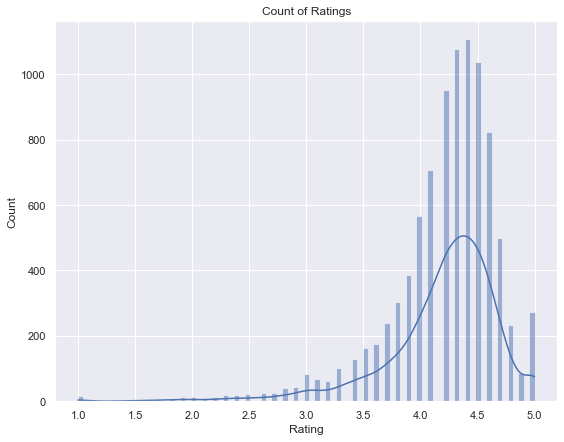

In [70]:
# Show the distribution of all ratings
print(df.Rating.value_counts())
plot = sns.histplot(data=df, x='Rating', kde=True)
plot.set(title='Count of Ratings')

Rating
1.0            28
1.2            44
1.4            98
1.5            61
1.6           691
1.7          2360
1.8          3418
1.9          3781
2.0          2997
2.1          3073
2.2          1979
2.3          2361
2.4         14829
2.5         20184
2.6          4257
2.7         27708
2.8        124890
2.9         57937
3.0        162933
3.1        320836
3.2        228320
3.3       1550176
3.4        958289
3.5       1648536
3.6       1822819
3.7       9978590
3.8      10900396
3.9      14831019
4.0     282617594
4.1     253744045
4.2     220642167
4.3     670892716
4.4    1026002986
4.5    1304281301
4.6     779348285
4.7     208458135
4.8      23590734
4.9       2312993
5.0          2395
Name: Reviews, dtype: int32


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.2'),
  Text(2, 0, '1.4'),
  Text(3, 0, '1.5'),
  Text(4, 0, '1.6'),
  Text(5, 0, '1.7'),
  Text(6, 0, '1.8'),
  Text(7, 0, '1.9'),
  Text(8, 0, '2.0'),
  Text(9, 0, '2.1'),
  Text(10, 0, '2.2'),
  Text(11, 0, '2.3'),
  Text(12, 0, '2.4'),
  Text(13, 0, '2.5'),
  Text(14, 0, '2.6'),
  Text(15, 0, '2.7'),
  Text(16, 0, '2.8'),
  Text(17, 0, '2.9'),
  Text(18, 0, '3.0'),
  Text(19, 0, '3.1'),
  Text(20, 0, '3.2'),
  Text(21, 0, '3.3'),
  Text(22, 0, '3.4'),
  Text(23, 0, '3.5'),
  Text(24, 0, '3.6'),
  Text(25, 0, '3.7'),
  Text(26, 0, '3.8'),
  Text(27, 0, '3.9'),
  Text(28, 0, '4.0'),
  Text(29, 0, '4.1'),
  Text(30, 0, '4.2'),
  Text(31, 0, '4.3'),
  Text(32, 0, '4.4'),
  Text(33, 0, '4.5'),
  Text(34, 0, '4.6'),
  Text(35, 0, '4.7'),
  Text(36, 0, '4.8'),
  Text(37, 0, 

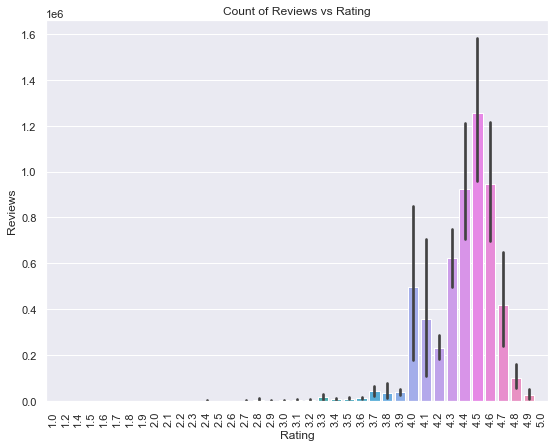

In [109]:
# Show the amount of reviews that apps with a specific rating have
print(df.groupby('Rating')['Reviews'].sum())
plot = sns.barplot(data=df, x='Rating', y='Reviews')
plot.set(title='Count of Reviews vs Rating')
plt.xticks(rotation=90)

Genres
Communication    815461799
Social           621241091
Casual           412078812
Action           350303919
Arcade           336990398
Strategy         327198469
Tools            272837822
Photography      213516607
Sports           192877016
Shopping         115041033
Name: Reviews, dtype: int32


<AxesSubplot:xlabel='Genres'>

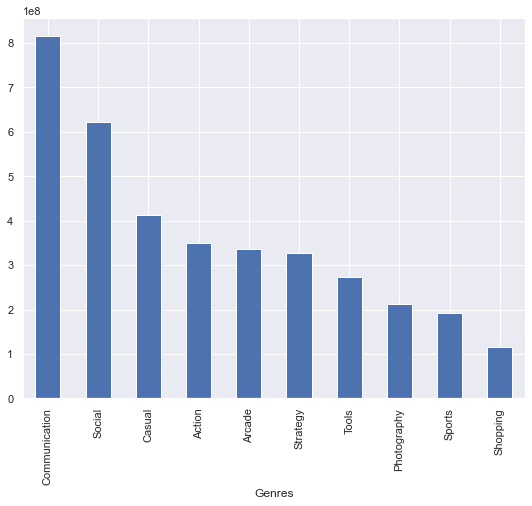

In [87]:
# Examine how many reviews each genre has
# Note - Need to fix crowded names on x-axis
print(df.groupby('Genres')['Reviews'].sum().sort_values(ascending=False)[:10])
df.groupby('Genres')['Reviews'].sum().sort_values(ascending=False)[:10].plot.bar()

Tools            732
Entertainment    533
Education        468
Action           358
Productivity     351
Medical          350
Sports           333
Communication    328
Finance          323
Photography      317
Name: Genres, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tools'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Productivity'),
  Text(5, 0, 'Medical'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Communication'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Photography')])

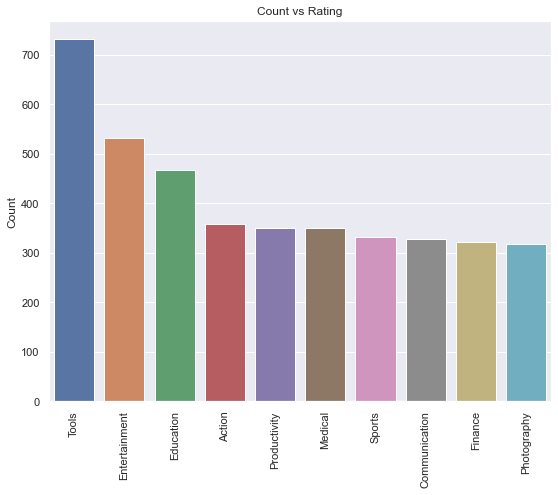

In [123]:
# Examine the amount of ratings each genre has
# Note - Need to fix crowded names on x-axis
query = df['Genres'].value_counts()[:10]
print(query)

plot = sns.barplot(x=query.index, y=query.values)
plot.set(title='Count vs Rating', ylabel='Count')
plt.xticks(rotation=90)

In [12]:
# Shows the count of total apps with the given genre
print(df['Genres'].value_counts())

Tools                      732
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: Genres, Length: 115, dtype: int64


<h3><u> Machine Learning and Predictions </u></h3>
<p> To Do:<br>
<i>Fix crowded x-axis on some graphs <br>
Debug Errors <br>
Examine various modeling algorithms <br>
Examine test and training rmse<br>
Graph test and training rmse<br>
Examine accuracy of each algorithm used</i></p>

In [13]:
# Function to calculate rmse
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [14]:
# select the predictor variables and target variables to be used with regression
predictors = ['Rating']
#dropping categortical features, such as ocean_proximity, including spatial ones such as long/lat.
target = 'Installs'
X = df[predictors].values
y = df[target].values
# Split the data into training and test sets, and scale
scaler = StandardScaler()

# unscaled version (note that scaling is only used on predictor variables)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [ ]:
# Needs to be debugged
regr = KNeighborsRegressor()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
test_rmse = rmse(predictions, y_test)
print('test RMSE, default hyperparameters: {0:.1f}'.format(test_rmse))